In [1]:
############ Plot Stacked Bar Charts River Sediment in Regions Over Time ###################
# The purpose of this script is to make plots that have stacked barcharts
# of riverine sediment in different regions over time, one plot for each river. The goal is to make
# a mini version of the giant version only showing 4 rivers with both their 
# aggregated and unaggregated.
#
# Notes:
# - This has been updated to take out the rivers that are no longer in the 2020 model
#   runs that use Blaskey river data 
# - Note this is similar to plot_river_sed_kg_regions_time.py but uses post-processed
#   data to simply make the plots so they can be made faster.
###################################################################################

In [2]:
# Load in the packages 
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import transforms 
from matplotlib import cm, ticker
from glob import glob
import cmocean
#import matplotlib.ticker as tick
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Set a universal fontsize
fontsize = 22

# Set the tick size for all plots
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize)

# Prevent tick labels from overlapping
matplotlib.rcParams['xtick.major.pad'] = 12
matplotlib.rcParams['ytick.major.pad'] = 12

In [4]:
# Load in the grid
grid = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Include/KakAKgrd_shelf_big010_smooth006.nc')
#grid = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Grids/KakAKgrd_shelf_big010_smooth006.nc') # UPDATE PATH


In [5]:
# Pull out some dimensions
eta_rho_len = len(grid.eta_rho)
xi_rho_len = len(grid.xi_rho)
s_rho_len = int(20)
Nbed_len = 11

# Multiply by masks to make land appear 
# Make it so land will appear
temp_mask = grid.mask_rho.copy()
temp_mask = np.where(temp_mask==0, np.nan, temp_mask)

In [6]:
# Load in the rho masks 
mask_rho_nan = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_ones_nans.nc') # UPDATE PATH
mask_rho_zeros = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_zeros_ones.nc')
#mask_rho_nan = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_ones_nans.nc')
#mask_rho_zeros = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_zeros_ones.nc')


In [7]:
# Load in the river forcing file 
# -- Aggregated --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_001.nc')
# (2020)
river_frc = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Include/river_forcing_file_beaufort_shelf_10rivs_13seabed_blaskey_data_sagDSS3_rating_001.nc')
# -- Unaggregated (it is the same for now) --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_003.nc')


In [8]:
# Load in the post-processed data for plotting 
# Aggregated 
agg_riv_sed_regions = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/River_sed_depths/kg_suspended_sed_from_rivers_in_depth_regions_aggregated_dbsed0001.nc')
agg_riv_sed_regions


<xarray.Dataset> Size: 242kB
Dimensions:            (ocean_time: 738)
Coordinates:
  * ocean_time         (ocean_time) datetime64[ns] 6kB 2020-07-01T01:00:00 .....
Data variables: (12/40)
    kg_sed_0_10m_kal   (ocean_time) float64 6kB ...
    kg_sed_10_20m_kal  (ocean_time) float64 6kB ...
    kg_sed_20_30m_kal  (ocean_time) float64 6kB ...
    kg_sed_30_60m_kal  (ocean_time) float64 6kB ...
    kg_sed_0_10m_col   (ocean_time) float64 6kB ...
    kg_sed_10_20m_col  (ocean_time) float64 6kB ...
    ...                 ...
    kg_sed_20_30m_hul  (ocean_time) float64 6kB ...
    kg_sed_30_60m_hul  (ocean_time) float64 6kB ...
    kg_sed_0_10m_jag   (ocean_time) float64 6kB ...
    kg_sed_10_20m_jag  (ocean_time) float64 6kB ...
    kg_sed_20_30m_jag  (ocean_time) float64 6kB ...
    kg_sed_30_60m_jag  (ocean_time) float64 6kB ...
Attributes:
    description:  Time-series ROMS output of suspended sediment mass from eac...

In [9]:
# Load in the post-processed data for plotting 
# Unaggregated 
unag_riv_sed_regions = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/River_sed_depths/kg_suspended_sed_from_rivers_in_depth_regions_unaggregated_dbsed0001.nc')
unag_riv_sed_regions

<xarray.Dataset> Size: 242kB
Dimensions:            (ocean_time: 738)
Coordinates:
  * ocean_time         (ocean_time) datetime64[ns] 6kB 2020-07-01T01:00:00 .....
Data variables: (12/40)
    kg_sed_0_10m_kal   (ocean_time) float64 6kB ...
    kg_sed_10_20m_kal  (ocean_time) float64 6kB ...
    kg_sed_20_30m_kal  (ocean_time) float64 6kB ...
    kg_sed_30_60m_kal  (ocean_time) float64 6kB ...
    kg_sed_0_10m_col   (ocean_time) float64 6kB ...
    kg_sed_10_20m_col  (ocean_time) float64 6kB ...
    ...                 ...
    kg_sed_20_30m_hul  (ocean_time) float64 6kB ...
    kg_sed_30_60m_hul  (ocean_time) float64 6kB ...
    kg_sed_0_10m_jag   (ocean_time) float64 6kB ...
    kg_sed_10_20m_jag  (ocean_time) float64 6kB ...
    kg_sed_20_30m_jag  (ocean_time) float64 6kB ...
    kg_sed_30_60m_jag  (ocean_time) float64 6kB ...
Attributes:
    description:  Time-series ROMS output of suspended sediment mass from eac...

### Prep for Plotting
Prep/Organize the data to make plotting easier

Divide the data into sections and group to help with plotting 

In [10]:
# Make a list of labels in order
labels_tmp = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_tmp2 = ['Kalikpik', 'Colville', 'Sagavanirktok', 'Fish Creek', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_all_13rivs = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparik', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed
labels_all = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparik', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']


# Make a list of all colors in order (rivers then seabed sections)
#colors_tmp = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
 #               'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
  #              'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
   #             'hotpink', 'pink', 'lightgray', 'yellowgreen',
     #                            'mediumturquoise']

# =============================================================================
# colors_all = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
#                 'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
#                 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
#                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
#                                  'mediumturquoise', 'powderblue' ]
# =============================================================================

# Make a list of seabed colors
seabed_colors = ['cornflowerblue', 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
                 'mediumturquoise', 'powderblue']

# Make a list of colors for the rivers 
river_colors = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
                'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink']

# Make list of colors to use for plots
seabed_section_colors = ['#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
                         '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F', 
                         '#FF6100', '#FFB000','#6490FF']
#river_marker_colors = ['#FC440F', '#00A6A6', '#5EF38C', '#26532B', '#0115F5',
               #        '#9C00A8', '#F43ECF', '#F5ED00']
river_marker_colors = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
                       '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40']

# New colors tmp
# River Order: Kalikpik, Fish Creek, Colville, Sakonowyak, Kuparuk, Putuligayuk, 
# Sagavanirktok, Staines, Canning, Katakturuk, Hulahula, Jago, Siksik, 
# Section 1 ..., Section 13 (sections are in order)
colors_tmp_13rivs = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed 
colors_tmp = ['#FC440F', '#F5ED00', '#5EF38C', '#F43ECF',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 


# New colors tmp2 - with colors for sections 6, 7, 13 removed since we are ignoring those for now
colors_tmp2 = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000']

In [11]:
# Make a function to make datasets 
def make_riv_regions_dataset_for_given_river(dataset, kg_sed_0_10m_masked_trimmed_sum, kg_sed_10_20m_masked_trimmed_sum, kg_sed_20_30m_masked_trimmed_sum, kg_sed_30_60m_masked_trimmed_sum, time_steps): 
    """
    This function takes a given dataset of post-processed model output, 
    then makes a dataset that has the data for ariver for all time. 
    This function needs to be called once for each river, and once for 
    aggregated mud and again for unaggregated mud.

    Inputs:
    - dataset: Loaded netCDF of the data
    - kg_sed_0_10m_masked_trimmed_sum: The data of the sediment from the given river in 0 - 10 m depths
    - kg_sed_10_20m_masked_trimmed_sum: The data of the sediment from the given river in 10 - 20 m depths
    - kg_sed_20_30m_masked_trimmed_sum: The data of the sediment from the given river in 20 - 30 m depths
    - kg_sed_30_60m_masked_trimmed_sum: The data of the sediment from the given river in 30 - 40 m depths
    - time_steps: List of times of the model output

    Outputs:
    - df_riv: A dataframe containing the data for a given river

    """

    # Make a dataset of the subset data 
    df_riv = pd.DataFrame({
        '0 - 10 m': kg_sed_0_10m_masked_trimmed_sum,
        '10 - 20 m': kg_sed_10_20m_masked_trimmed_sum,
        '20 - 30 m': kg_sed_20_30m_masked_trimmed_sum,
        '30 - 60 m': kg_sed_30_60m_masked_trimmed_sum},
        index=time_steps)


    # Return this 
    return(df_riv)




In [12]:
# Call the above function for each section, both aggregated and unaggregated
# Kalikpik
df_kal_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_kal, agg_riv_sed_regions.kg_sed_10_20m_kal, agg_riv_sed_regions.kg_sed_20_30m_kal, agg_riv_sed_regions.kg_sed_30_60m_kal, agg_riv_sed_regions.ocean_time)
df_kal_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_kal, unag_riv_sed_regions.kg_sed_10_20m_kal, unag_riv_sed_regions.kg_sed_20_30m_kal, unag_riv_sed_regions.kg_sed_30_60m_kal, unag_riv_sed_regions.ocean_time)
# Colville
df_col_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_col, agg_riv_sed_regions.kg_sed_10_20m_col, agg_riv_sed_regions.kg_sed_20_30m_col, agg_riv_sed_regions.kg_sed_30_60m_col, agg_riv_sed_regions.ocean_time)
df_col_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_col, unag_riv_sed_regions.kg_sed_10_20m_col, unag_riv_sed_regions.kg_sed_20_30m_col, unag_riv_sed_regions.kg_sed_30_60m_col, unag_riv_sed_regions.ocean_time)
# Sagavanirktok
df_sag_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_sag, agg_riv_sed_regions.kg_sed_10_20m_sag, agg_riv_sed_regions.kg_sed_20_30m_sag, agg_riv_sed_regions.kg_sed_30_60m_sag, agg_riv_sed_regions.ocean_time)
df_sag_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_sag, unag_riv_sed_regions.kg_sed_10_20m_sag, unag_riv_sed_regions.kg_sed_20_30m_sag, unag_riv_sed_regions.kg_sed_30_60m_sag, unag_riv_sed_regions.ocean_time)
# Fish Creek
df_fis_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_fis, agg_riv_sed_regions.kg_sed_10_20m_fis, agg_riv_sed_regions.kg_sed_20_30m_fis, agg_riv_sed_regions.kg_sed_30_60m_fis, agg_riv_sed_regions.ocean_time)
df_fis_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_fis, unag_riv_sed_regions.kg_sed_10_20m_fis, unag_riv_sed_regions.kg_sed_20_30m_fis, unag_riv_sed_regions.kg_sed_30_60m_fis, unag_riv_sed_regions.ocean_time)
# # Sakonowyak
#df_sak_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_sak, agg_riv_sed_regions.kg_sed_10_20m_sak, agg_riv_sed_regions.kg_sed_20_30m_sak, agg_riv_sed_regions.kg_sed_30_60m_sak, agg_riv_sed_regions.ocean_time)
#df_sak_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_sak, unag_riv_sed_regions.kg_sed_10_20m_sak, unag_riv_sed_regions.kg_sed_20_30m_sak, unag_riv_sed_regions.kg_sed_30_60m_sak, unag_riv_sed_regions.ocean_time)#
# Kuparik
df_kup_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_kup, agg_riv_sed_regions.kg_sed_10_20m_kup, agg_riv_sed_regions.kg_sed_20_30m_kup, agg_riv_sed_regions.kg_sed_30_60m_kup, agg_riv_sed_regions.ocean_time)
df_kup_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_kup, unag_riv_sed_regions.kg_sed_10_20m_kup, unag_riv_sed_regions.kg_sed_20_30m_kup, unag_riv_sed_regions.kg_sed_30_60m_kup, unag_riv_sed_regions.ocean_time)
# # Putuligayuk
#df_put_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_put, agg_riv_sed_regions.kg_sed_10_20m_put, agg_riv_sed_regions.kg_sed_20_30m_put, agg_riv_sed_regions.kg_sed_30_60m_put, agg_riv_sed_regions.ocean_time)
#df_put_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_put, unag_riv_sed_regions.kg_sed_10_20m_put, unag_riv_sed_regions.kg_sed_20_30m_put, unag_riv_sed_regions.kg_sed_30_60m_put, unag_riv_sed_regions.ocean_time)
# Staines
df_sta_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_sta, agg_riv_sed_regions.kg_sed_10_20m_sta, agg_riv_sed_regions.kg_sed_20_30m_sta, agg_riv_sed_regions.kg_sed_30_60m_sta, agg_riv_sed_regions.ocean_time)
df_sta_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_sta, unag_riv_sed_regions.kg_sed_10_20m_sta, unag_riv_sed_regions.kg_sed_20_30m_sta, unag_riv_sed_regions.kg_sed_30_60m_sta, unag_riv_sed_regions.ocean_time)
# Canning
df_can_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_can, agg_riv_sed_regions.kg_sed_10_20m_can, agg_riv_sed_regions.kg_sed_20_30m_can, agg_riv_sed_regions.kg_sed_30_60m_can, agg_riv_sed_regions.ocean_time)
df_can_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_can, unag_riv_sed_regions.kg_sed_10_20m_can, unag_riv_sed_regions.kg_sed_20_30m_can, unag_riv_sed_regions.kg_sed_30_60m_can, unag_riv_sed_regions.ocean_time)
# Katakturuk
df_kat_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_kat, agg_riv_sed_regions.kg_sed_10_20m_kat, agg_riv_sed_regions.kg_sed_20_30m_kat, agg_riv_sed_regions.kg_sed_30_60m_kat, agg_riv_sed_regions.ocean_time)
df_kat_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_kat, unag_riv_sed_regions.kg_sed_10_20m_kat, unag_riv_sed_regions.kg_sed_20_30m_kat, unag_riv_sed_regions.kg_sed_30_60m_kat, unag_riv_sed_regions.ocean_time)
# Hulahula
df_hul_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_hul, agg_riv_sed_regions.kg_sed_10_20m_hul, agg_riv_sed_regions.kg_sed_20_30m_hul, agg_riv_sed_regions.kg_sed_30_60m_hul, agg_riv_sed_regions.ocean_time)
df_hul_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_hul, unag_riv_sed_regions.kg_sed_10_20m_hul, unag_riv_sed_regions.kg_sed_20_30m_hul, unag_riv_sed_regions.kg_sed_30_60m_hul, unag_riv_sed_regions.ocean_time)
# Jago
df_jag_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_jag, agg_riv_sed_regions.kg_sed_10_20m_jag, agg_riv_sed_regions.kg_sed_20_30m_jag, agg_riv_sed_regions.kg_sed_30_60m_jag, agg_riv_sed_regions.ocean_time)
df_jag_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_jag, unag_riv_sed_regions.kg_sed_10_20m_jag, unag_riv_sed_regions.kg_sed_20_30m_jag, unag_riv_sed_regions.kg_sed_30_60m_jag, unag_riv_sed_regions.ocean_time)
# # Siksik
#df_sik_agg = make_riv_regions_dataset_for_given_river(agg_riv_sed_regions, agg_riv_sed_regions.kg_sed_0_10m_sik, agg_riv_sed_regions.kg_sed_10_20m_sik, agg_riv_sed_regions.kg_sed_20_30m_sik, agg_riv_sed_regions.kg_sed_30_60m_sik, agg_riv_sed_regions.ocean_time)
#df_sik_unag = make_riv_regions_dataset_for_given_river(unag_riv_sed_regions, unag_riv_sed_regions.kg_sed_0_10m_sik, unag_riv_sed_regions.kg_sed_10_20m_sik, unag_riv_sed_regions.kg_sed_20_30m_sik, unag_riv_sed_regions.kg_sed_30_60m_sik, unag_riv_sed_regions.ocean_time)

In [13]:
# Set the colors for the different regions 
colors = ['royalblue', 'red', 'gold', 'purple']

### Plots!
Make some plots!

Text(0.5, 1.0, 'Kalikpik River Sediment Mass on Shelf')

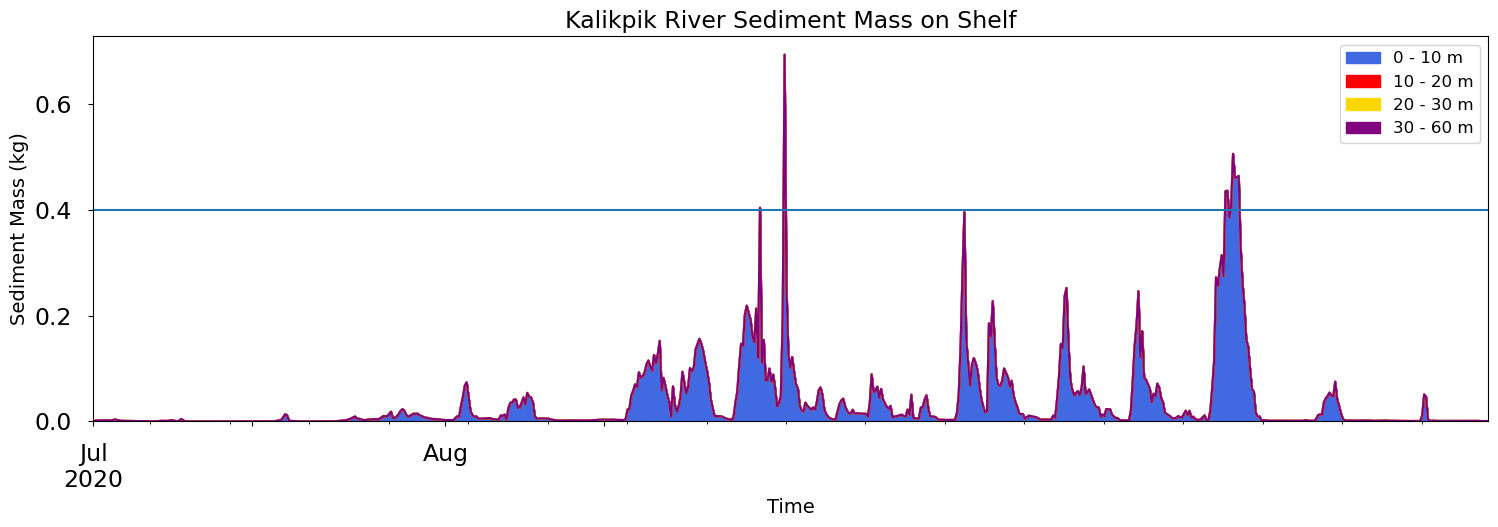

In [14]:
# Test plot to see if this worked....
# Don't use pandas, use matplotlib since pandas adds random layer for 0s
# Make the figure - version using pandas
fig3, ax3 = plt.subplots(figsize=(18,5))
# Set the colors
colors3 = ['royalblue', 'red', 'gold', 'purple']

xticks = ['2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15']
# Format the x-axis 
ax3.xaxis.set_major_formatter('%Y-%m-%d')
df_kal_agg.plot.area(ax=ax3, fontsize=fontsize-5, color=colors3, xticks=xticks)
ax3.legend(fontsize=fontsize-10)
ax3.axhline(0.4)
#ax3.xaxis.set_major_formatter("%Y-%m-%d")
ax3.set_xlabel('Time', fontsize=fontsize-8)
ax3.set_ylabel('Sediment Mass (kg)', fontsize=fontsize-8)
ax3.set_title('Kalikpik River Sediment Mass on Shelf', fontsize=fontsize-5)
#plt.setp(ax3.get_xticklabels(), visible=False)
#plt.xticks([])

([<matplotlib.axis.XTick at 0x14a2a5394690>,
 [Text(18444.0, 0, '2020-07-01'),
  Text(18475.0, 0, '2020-08-01'),
  Text(18506.0, 0, '2020-09-01'),
  Text(18536.0, 0, '2020-10-01'),
  Text(18567.0, 0, '2020-11-01')])

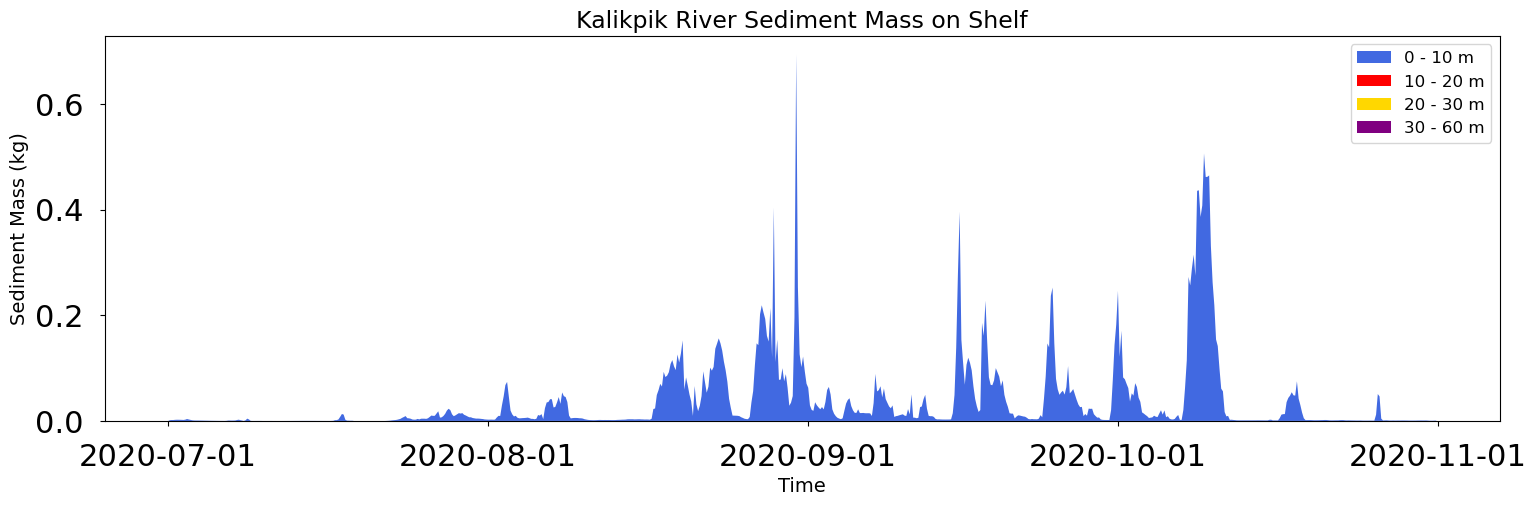

In [15]:
# Make the figure - version using matplotlib
fig3, ax3 = plt.subplots(figsize=(18,5))
# Set the colors
colors3 = ['royalblue', 'red', 'gold', 'purple']
# Format the x-axis 
#ax3.xaxis.set_major_formatter('%Y-%m-%d')
ax3.stackplot(df_kal_agg.index, df_kal_agg['0 - 10 m'], df_kal_agg['10 - 20 m'], df_kal_agg['20 - 30 m'], 
              df_kal_agg['30 - 60 m'], labels=df_kal_agg.columns, colors=colors3)
ax3.legend(fontsize=fontsize-10)
#ax3.axhline(0.4)
#ax3.xaxis.set_major_formatter("%Y-%m-%d")
ax3.set_xlabel('Time', fontsize=fontsize-8)
ax3.set_ylabel('Sediment Mass (kg)', fontsize=fontsize-8)
ax3.set_title('Kalikpik River Sediment Mass on Shelf', fontsize=fontsize-5)
#plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(['2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01'])

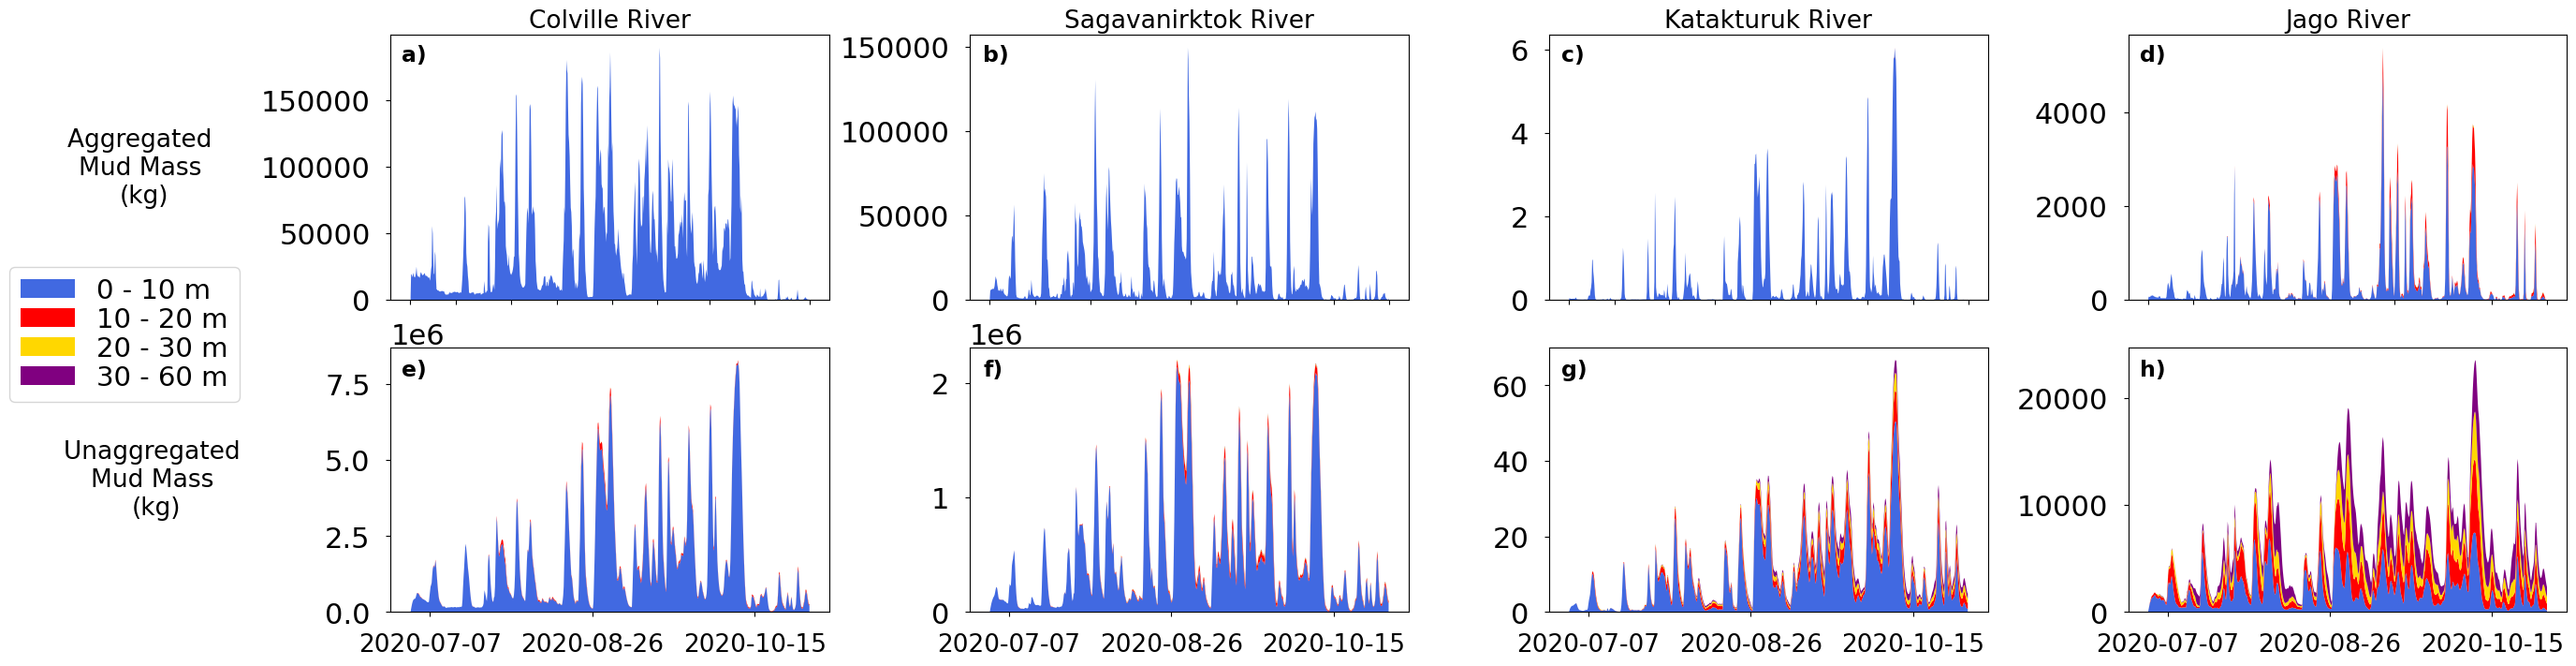

In [27]:
# Make a version for 4 rivers of choice
# Colville, Sagavanirktok, Katakturuk, Jago
fig6, ax6 = plt.subplots(2, 4, figsize=(30,8))

# Set the colors for the different regions 
colors = ['royalblue', 'red', 'gold', 'purple']

# Aggregated
# Colville
ax6[0,0].stackplot(df_col_agg.index, df_col_agg['0 - 10 m'], df_col_agg['10 - 20 m'], df_col_agg['20 - 30 m'], 
              df_col_agg['30 - 60 m'], labels=df_col_agg.columns, colors=colors)
ax6[0,0].set_title('Colville River', fontsize=fontsize-3)
ax6[0,0].set_ylabel('Aggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
plt.setp(ax6[0,0].get_xticklabels(), visible=False)
#ax6[0,0].set_ylim([0,3e6])

# Sagavanirktok
ax6[0,1].stackplot(df_sag_agg.index, df_sag_agg['0 - 10 m'], df_sag_agg['10 - 20 m'], df_sag_agg['20 - 30 m'], 
              df_sag_agg['30 - 60 m'], labels=df_sag_agg.columns, colors=colors)
ax6[0,1].set_title('Sagavanirktok River', fontsize=fontsize-3)
plt.setp(ax6[0,1].get_xticklabels(), visible=False)
#ax6[0,1].set_ylim([0,3e6])

# Katakturuk
ax6[0,2].stackplot(df_kat_agg.index, df_kat_agg['0 - 10 m'], df_kat_agg['10 - 20 m'], df_kat_agg['20 - 30 m'], 
              df_kat_agg['30 - 60 m'], labels=df_kat_agg.columns, colors=colors)
ax6[0,2].set_title('Katakturuk River', fontsize=fontsize-3)
plt.setp(ax6[0,2].get_xticklabels(), visible=False)
#ax6[0,2].set_ylim([0,3e6])

# Jago
ax6[0,3].stackplot(df_jag_agg.index, df_jag_agg['0 - 10 m'], df_jag_agg['10 - 20 m'], df_jag_agg['20 - 30 m'], 
              df_jag_agg['30 - 60 m'], labels=df_jag_agg.columns, colors=colors)
ax6[0,3].set_title('Jago River', fontsize=fontsize-3)
plt.setp(ax6[0,3].get_xticklabels(), visible=False)
#ax6[0,2].set_ylim([0,3e6])


# Unaggregated 
# Colville
ax6[1,0].stackplot(df_col_unag.index, df_col_unag['0 - 10 m'], df_col_unag['10 - 20 m'], df_col_unag['20 - 30 m'], 
              df_col_unag['30 - 60 m'], labels=df_col_unag.columns, colors=colors)
plt.setp(ax6[1,0].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,0].set_ylabel('Unaggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=130)
ax6[1,0].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Sagavanirktok
ax6[1,1].stackplot(df_sag_unag.index, df_sag_unag['0 - 10 m'], df_sag_unag['10 - 20 m'], df_sag_unag['20 - 30 m'], 
              df_sag_unag['30 - 60 m'], labels=df_sag_unag.columns, colors=colors)
plt.setp(ax6[1,1].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,1].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Katakturuk
ax6[1,2].stackplot(df_kat_unag.index, df_kat_unag['0 - 10 m'], df_kat_unag['10 - 20 m'], df_kat_unag['20 - 30 m'], 
              df_kat_unag['30 - 60 m'], labels=df_kat_unag.columns, colors=colors)
plt.setp(ax6[1,2].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,2].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Jago
ax6[1,3].stackplot(df_jag_unag.index, df_jag_unag['0 - 10 m'], df_jag_unag['10 - 20 m'], df_jag_unag['20 - 30 m'], 
              df_jag_unag['30 - 60 m'], labels=df_jag_unag.columns, colors=colors)
plt.setp(ax6[1,3].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,3].xaxis.set_major_locator(ticker.MaxNLocator(3))
#ax6[0,2].set_ylim([0,3e6])

# Set universal legend 
# Put a legend for the rivers
#ax6[3,2].legend(fontsize=fontsize-4, loc='lower left', ncol=1, 
 #             labelspacing=0.1,  bbox_to_anchor=(1.17, 0.1))
ax6[1,0].legend(fontsize=fontsize-1, loc='center left', ncol=1, 
              labelspacing=0.1,  bbox_to_anchor=(-0.90, 1.05))

# Add subplot labels 
fig6.text(0.129, 0.845, 'a)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.336, 0.845, 'b)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.542, 0.845, 'c)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.748, 0.845, 'd)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.129, 0.425, 'e)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.336, 0.425, 'f)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.542, 0.425, 'g)', color='black', fontsize=fontsize-5, weight='bold')
fig6.text(0.748, 0.425, 'h)', color='black', fontsize=fontsize-5, weight='bold')


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.18, wspace=0.32) #0.08

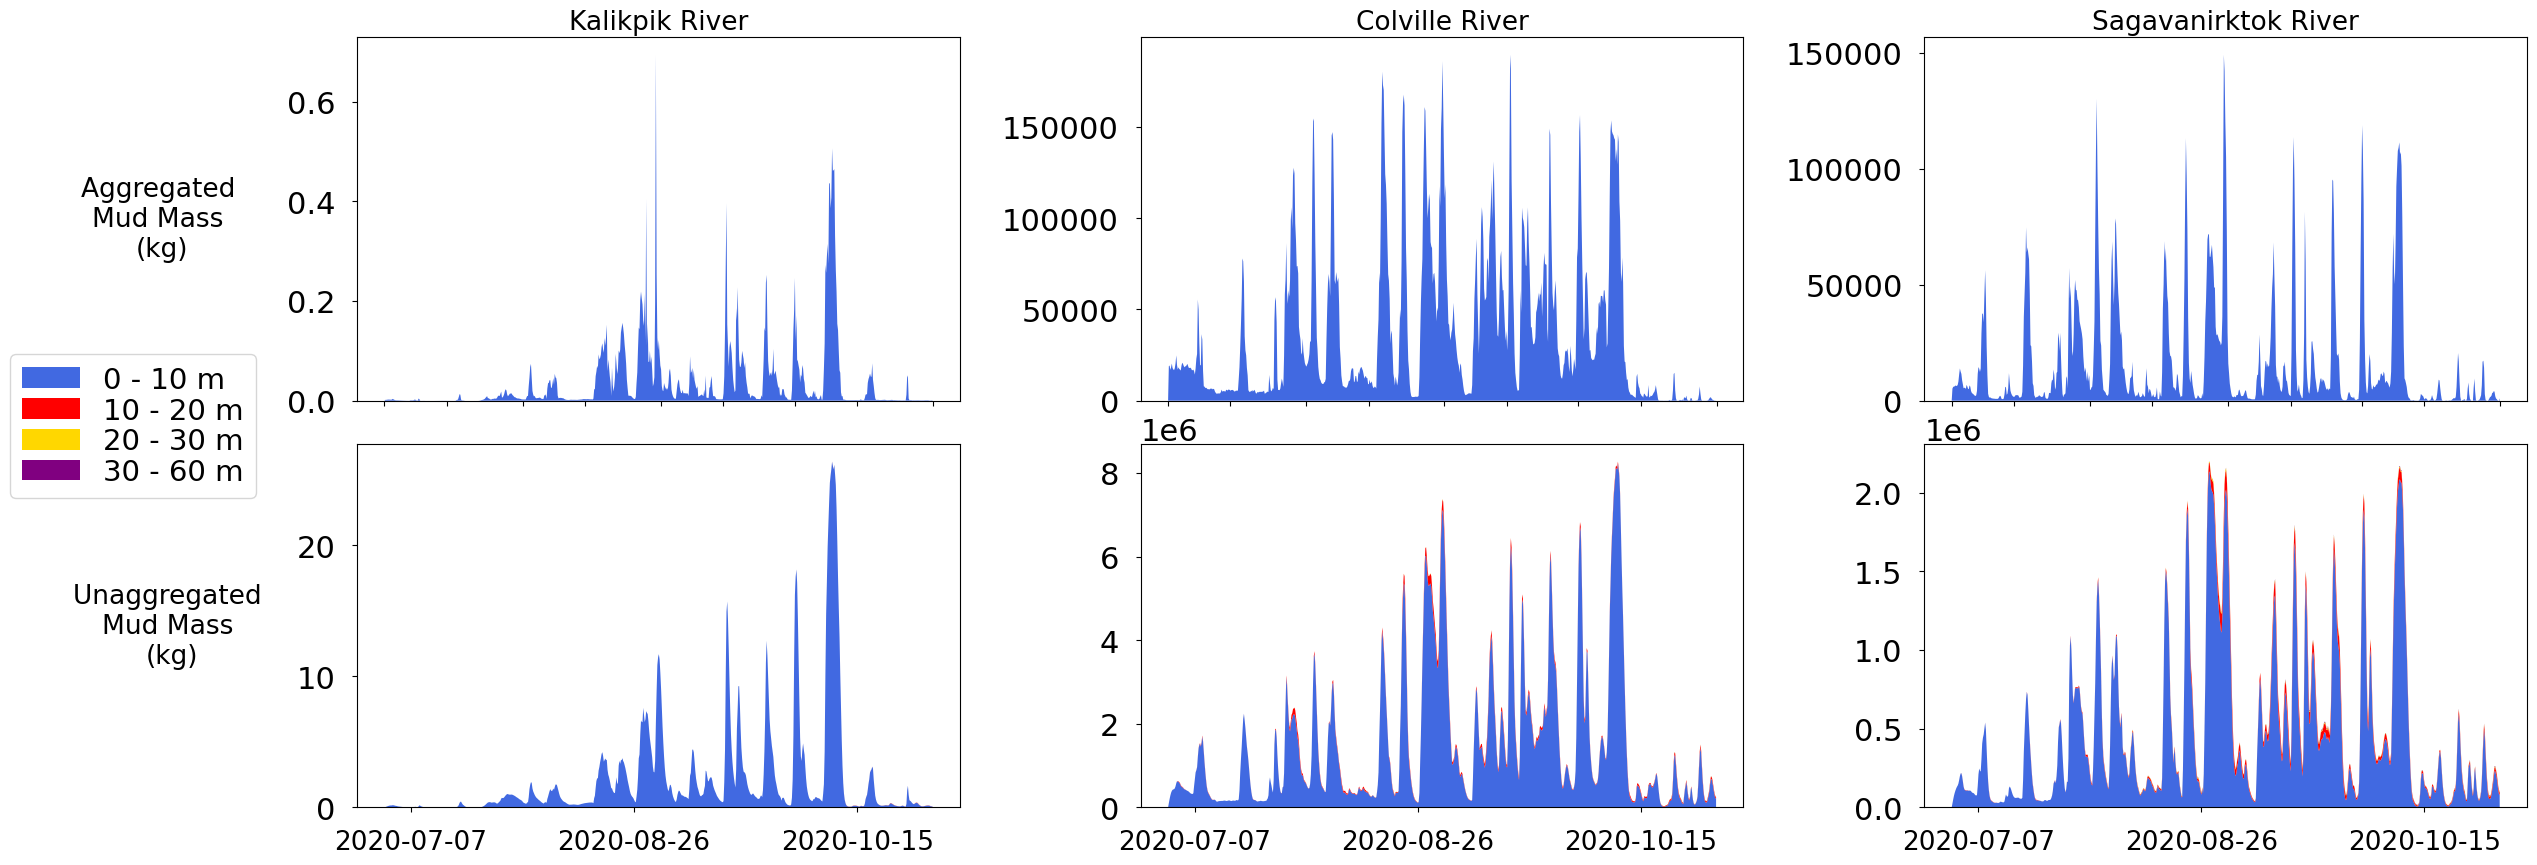

In [17]:
# Plot all rivers just to see 
# First 3: Kalikpik, Colville, Sagavanirktok
# Now make a subplot and plot them
fig6, ax6 = plt.subplots(2, 3, figsize=(28,10))

# Set the colors for the different regions 
colors = ['royalblue', 'red', 'gold', 'purple']

# Aggregated
# Kalikpik 
ax6[0,0].stackplot(df_kal_agg.index, df_kal_agg['0 - 10 m'], df_kal_agg['10 - 20 m'], df_kal_agg['20 - 30 m'], 
              df_kal_agg['30 - 60 m'], labels=df_kal_agg.columns, colors=colors)
ax6[0,0].set_title('Kalikpik River', fontsize=fontsize-3)
ax6[0,0].set_ylabel('Aggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
plt.setp(ax6[0,0].get_xticklabels(), visible=False)
#ax6[0,0].set_ylim([0,3e6])

# Colville
ax6[0,1].stackplot(df_col_agg.index, df_col_agg['0 - 10 m'], df_col_agg['10 - 20 m'], df_col_agg['20 - 30 m'], 
              df_col_agg['30 - 60 m'], labels=df_col_agg.columns, colors=colors)
ax6[0,1].set_title('Colville River', fontsize=fontsize-3)
plt.setp(ax6[0,1].get_xticklabels(), visible=False)
#ax6[0,1].set_ylim([0,3e6])

# Sagavanirktok
ax6[0,2].stackplot(df_sag_agg.index, df_sag_agg['0 - 10 m'], df_sag_agg['10 - 20 m'], df_sag_agg['20 - 30 m'], 
              df_sag_agg['30 - 60 m'], labels=df_sag_agg.columns, colors=colors)
ax6[0,2].set_title('Sagavanirktok River', fontsize=fontsize-3)
plt.setp(ax6[0,2].get_xticklabels(), visible=False)
#ax6[0,2].set_ylim([0,3e6])


# Unaggregated 
# Kalikpik 
ax6[1,0].stackplot(df_kal_unag.index, df_kal_unag['0 - 10 m'], df_kal_unag['10 - 20 m'], df_kal_unag['20 - 30 m'], 
              df_kal_unag['30 - 60 m'], labels=df_kal_unag.columns, colors=colors)
plt.setp(ax6[1,0].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,0].set_ylabel('Unaggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
ax6[1,0].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Colville
ax6[1,1].stackplot(df_col_unag.index, df_col_unag['0 - 10 m'], df_col_unag['10 - 20 m'], df_col_unag['20 - 30 m'], 
              df_col_unag['30 - 60 m'], labels=df_col_unag.columns, colors=colors)
plt.setp(ax6[1,1].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,1].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Sagavanirktok
ax6[1,2].stackplot(df_sag_unag.index, df_sag_unag['0 - 10 m'], df_sag_unag['10 - 20 m'], df_sag_unag['20 - 30 m'], 
              df_sag_unag['30 - 60 m'], labels=df_sag_unag.columns, colors=colors)
plt.setp(ax6[1,2].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,2].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Set universal legend 
# Put a legend for the rivers
#ax6[3,2].legend(fontsize=fontsize-4, loc='lower left', ncol=1, 
 #             labelspacing=0.1,  bbox_to_anchor=(1.17, 0.1))
ax6[1,0].legend(fontsize=fontsize-1, loc='center left', ncol=1, 
              labelspacing=0.1,  bbox_to_anchor=(-0.60, 1.05))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.12, wspace=0.30) #0.08

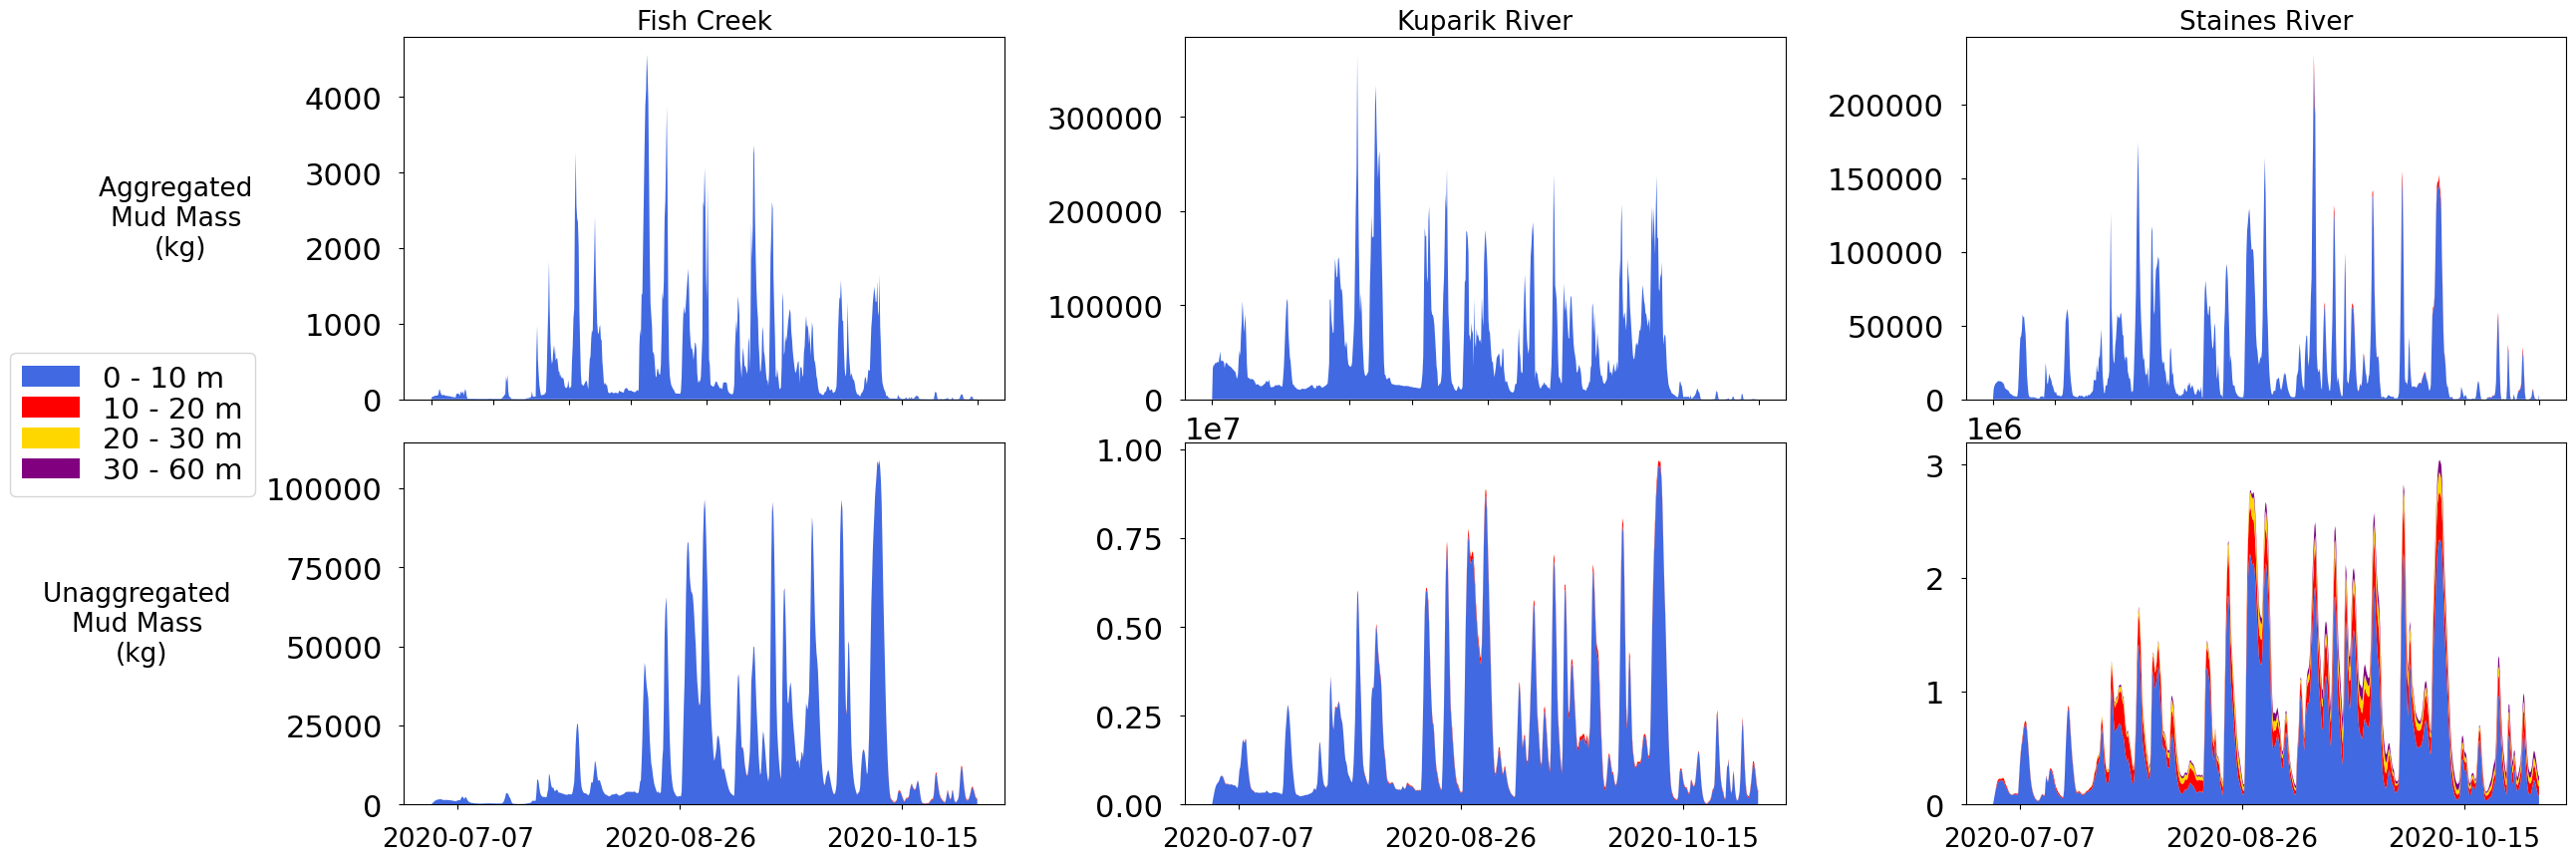

In [18]:
# Second 3: Fish creek, Kuparuk, Staines
# Now make a subplot and plot them
fig6, ax6 = plt.subplots(2, 3, figsize=(28,10))

# Set the colors for the different regions 
colors = ['royalblue', 'red', 'gold', 'purple']

# Aggregated
# Fish Creek
ax6[0,0].stackplot(df_fis_agg.index, df_fis_agg['0 - 10 m'], df_fis_agg['10 - 20 m'], df_fis_agg['20 - 30 m'], 
              df_fis_agg['30 - 60 m'], labels=df_fis_agg.columns, colors=colors)
ax6[0,0].set_title('Fish Creek', fontsize=fontsize-3)
ax6[0,0].set_ylabel('Aggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
plt.setp(ax6[0,0].get_xticklabels(), visible=False)
#ax6[0,0].set_ylim([0,3e6])

# Kuparik
ax6[0,1].stackplot(df_kup_agg.index, df_kup_agg['0 - 10 m'], df_kup_agg['10 - 20 m'], df_kup_agg['20 - 30 m'], 
              df_kup_agg['30 - 60 m'], labels=df_kup_agg.columns, colors=colors)
ax6[0,1].set_title('Kuparik River', fontsize=fontsize-3)
plt.setp(ax6[0,1].get_xticklabels(), visible=False)
#ax6[0,1].set_ylim([0,3e6])

# Staines
ax6[0,2].stackplot(df_sta_agg.index, df_sta_agg['0 - 10 m'], df_sta_agg['10 - 20 m'], df_sta_agg['20 - 30 m'], 
              df_sta_agg['30 - 60 m'], labels=df_sta_agg.columns, colors=colors)
ax6[0,2].set_title('Staines River', fontsize=fontsize-3)
plt.setp(ax6[0,2].get_xticklabels(), visible=False)
#ax6[0,2].set_ylim([0,3e6])


# Unaggregated 
# Fish Creek
ax6[1,0].stackplot(df_fis_unag.index, df_fis_unag['0 - 10 m'], df_fis_unag['10 - 20 m'], df_fis_unag['20 - 30 m'], 
              df_fis_unag['30 - 60 m'], labels=df_fis_unag.columns, colors=colors)
plt.setp(ax6[1,0].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,0].set_ylabel('Unaggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
ax6[1,0].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Kuparik
ax6[1,1].stackplot(df_kup_unag.index, df_kup_unag['0 - 10 m'], df_kup_unag['10 - 20 m'], df_kup_unag['20 - 30 m'], 
              df_kup_unag['30 - 60 m'], labels=df_kup_unag.columns, colors=colors)
plt.setp(ax6[1,1].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,1].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Staines
ax6[1,2].stackplot(df_sta_unag.index, df_sta_unag['0 - 10 m'], df_sta_unag['10 - 20 m'], df_sta_unag['20 - 30 m'], 
              df_sta_unag['30 - 60 m'], labels=df_sta_unag.columns, colors=colors)
plt.setp(ax6[1,2].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,2].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Set universal legend 
# Put a legend for the rivers
#ax6[3,2].legend(fontsize=fontsize-4, loc='lower left', ncol=1, 
 #             labelspacing=0.1,  bbox_to_anchor=(1.17, 0.1))
ax6[1,0].legend(fontsize=fontsize-1, loc='center left', ncol=1, 
              labelspacing=0.1,  bbox_to_anchor=(-0.68, 1.05))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.12, wspace=0.30) #0.08

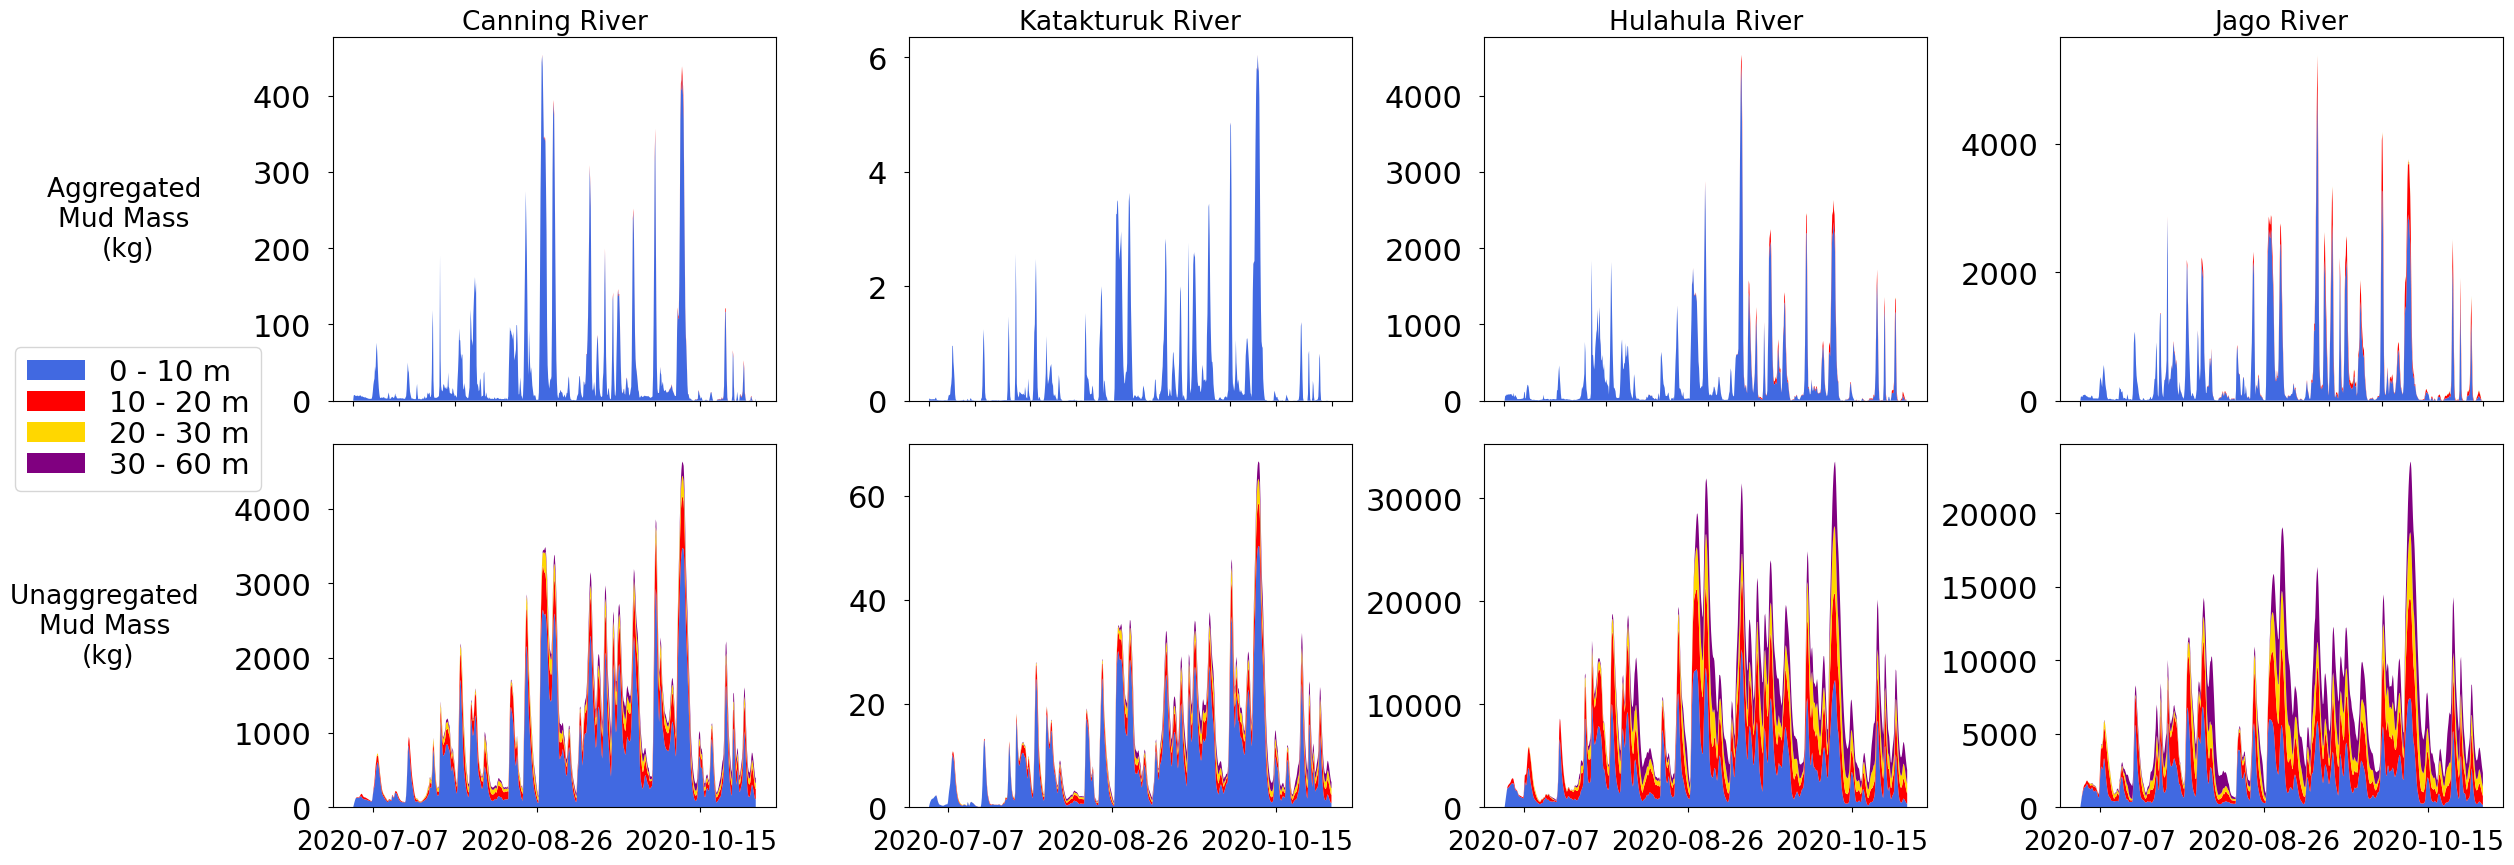

In [19]:
# Last 4: Canning, Katakturuk, Hulahula, Jago
# Now make a subplot and plot them
fig6, ax6 = plt.subplots(2, 4, figsize=(28,10))

# Set the colors for the different regions 
colors = ['royalblue', 'red', 'gold', 'purple']

# Aggregated
# Canning
ax6[0,0].stackplot(df_can_agg.index, df_can_agg['0 - 10 m'], df_can_agg['10 - 20 m'], df_can_agg['20 - 30 m'], 
              df_can_agg['30 - 60 m'], labels=df_can_agg.columns, colors=colors)
ax6[0,0].set_title('Canning River', fontsize=fontsize-3)
ax6[0,0].set_ylabel('Aggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
plt.setp(ax6[0,0].get_xticklabels(), visible=False)
#ax6[0,0].set_ylim([0,3e6])

# Katakturuk
ax6[0,1].stackplot(df_kat_agg.index, df_kat_agg['0 - 10 m'], df_kat_agg['10 - 20 m'], df_kat_agg['20 - 30 m'], 
              df_kat_agg['30 - 60 m'], labels=df_kat_agg.columns, colors=colors)
ax6[0,1].set_title('Katakturuk River', fontsize=fontsize-3)
plt.setp(ax6[0,1].get_xticklabels(), visible=False)
#ax6[0,1].set_ylim([0,3e6])

# Hulahula
ax6[0,2].stackplot(df_hul_agg.index, df_hul_agg['0 - 10 m'], df_hul_agg['10 - 20 m'], df_hul_agg['20 - 30 m'], 
              df_hul_agg['30 - 60 m'], labels=df_hul_agg.columns, colors=colors)
ax6[0,2].set_title('Hulahula River', fontsize=fontsize-3)
plt.setp(ax6[0,2].get_xticklabels(), visible=False)
#ax6[0,2].set_ylim([0,3e6])

# Jago
ax6[0,3].stackplot(df_jag_agg.index, df_jag_agg['0 - 10 m'], df_jag_agg['10 - 20 m'], df_jag_agg['20 - 30 m'], 
              df_jag_agg['30 - 60 m'], labels=df_jag_agg.columns, colors=colors)
ax6[0,3].set_title('Jago River', fontsize=fontsize-3)
plt.setp(ax6[0,3].get_xticklabels(), visible=False)
#ax6[0,2].set_ylim([0,3e6])


# Unaggregated 
# Canning
ax6[1,0].stackplot(df_can_unag.index, df_can_unag['0 - 10 m'], df_can_unag['10 - 20 m'], df_can_unag['20 - 30 m'], 
              df_can_unag['30 - 60 m'], labels=df_can_unag.columns, colors=colors)
plt.setp(ax6[1,0].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,0].set_ylabel('Unaggregated \nMud Mass \n(kg)', fontsize=fontsize-3, rotation=0, va='center', labelpad=90)
ax6[1,0].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Katakturuk
ax6[1,1].stackplot(df_kat_unag.index, df_kat_unag['0 - 10 m'], df_kat_unag['10 - 20 m'], df_kat_unag['20 - 30 m'], 
              df_kat_unag['30 - 60 m'], labels=df_kat_unag.columns, colors=colors)
plt.setp(ax6[1,1].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,1].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Hulahula
ax6[1,2].stackplot(df_hul_unag.index, df_hul_unag['0 - 10 m'], df_hul_unag['10 - 20 m'], df_hul_unag['20 - 30 m'], 
              df_hul_unag['30 - 60 m'], labels=df_hul_unag.columns, colors=colors)
plt.setp(ax6[1,2].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,2].xaxis.set_major_locator(ticker.MaxNLocator(3))

# Jago
ax6[1,3].stackplot(df_jag_unag.index, df_jag_unag['0 - 10 m'], df_jag_unag['10 - 20 m'], df_jag_unag['20 - 30 m'], 
              df_jag_unag['30 - 60 m'], labels=df_jag_unag.columns, colors=colors)
plt.setp(ax6[1,3].get_xticklabels(), visible=True, fontsize=fontsize-3)
ax6[1,3].xaxis.set_major_locator(ticker.MaxNLocator(3))
#ax6[0,2].set_ylim([0,3e6])

# Set universal legend 
# Put a legend for the rivers
#ax6[3,2].legend(fontsize=fontsize-4, loc='lower left', ncol=1, 
 #             labelspacing=0.1,  bbox_to_anchor=(1.17, 0.1))
ax6[1,0].legend(fontsize=fontsize-1, loc='center left', ncol=1, 
              labelspacing=0.1,  bbox_to_anchor=(-0.75, 1.07))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.12, wspace=0.30) #0.08